## **Data Exploration**

|Feature Name|Description|Data Type|
|-|-|-|
|<font color='green'>CLIENTNUM</font>|Unique identifier for the customer holding the account|
|<font color='green'>Attrition_Flag</font>|Internal event (customer activity) variable (Existing = 1, Attrited = 0)|<font color='red'>Categorical</font> [Output]|
|<font color='green'>Customer_Age</font>|Customer's Age in Years|<font color='red'>Numerical</font>|
|<font color='green'>Gender</font>|(M = Male, F = Female)|<font color='red'>Categorical</font>|
|<font color='green'>Dependent_Count</font>|Number of dependents|<font color='red'>Numerical</font>|
|<font color='green'>Education_Level</font>|Educational Qualification of the account holder (Uneducated, High School, College, Graduate, Post-Graduate, Doctorate, Unknown)|<font color='red'>Categorical</font>|
|<font color='green'>Marital_Status</font>|(Married, Single, Divorced, Unknown)|<font color='red'>Categorical</font>|
|<font color='green'>Income_Category</font>|Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >$120K)|<font color='red'>Categorical</font>|
|<font color='green'>Card_Category</font>|Type of Card (Blue, Silver, Gold, Platinum)</font>|<font color='red'>Categorical</font>|
|<font color='green'>Months_on_book</font>|Period of relationship with bank|<font color='red'>Numerical</font>|
|<font color='green'>Total_Relationship_Count</font>|Total no. of products held by the customer|<font color='red'>Numerical</font>|
|<font color='green'>Months_Inactive_12_mon</font>|No. of months inactive in the last 12 months|<font color='red'>Numerical</font>|
|<font color='green'>Contacts_Count_12_mon</font>|No. of Contacts in the last 12 months|<font color='red'>Numerical</font>|
|<font color='green'>Credit_Limit</font>|Credit Limit on the Credit Card|<font color='red'>Numerical</font>|
|<font color='green'>Total_Revolving_Bal</font>|Total Revolving Balance on the Credit Card|<font color='red'>Numerical</font>|
|<font color='green'>Avg_Open_To_Buy</font>|Open to Buy Credit Line (Average of last 12 months)|<font color='red'>Numerical</font>|
|<font color='green'>Total_Amt_Chng_Q4_Q1</font>|Change in Transaction Amount (Q4 over Q1)|<font color='red'>Numerical</font>|
|<font color='green'>Total_Trans_Amt</font>|Total Transaction Amount (Last 12 months)|<font color='red'>Numerical</font>|
|<font color='green'>Total_Trans_Ct</font>|Total Transaction Count (Last 12 months)|<font color='red'>Numerical</font>|
|<font color='green'>Total_Ct_Chng_Q4_Q1</font>|Change in Transaction Count (Q4 over Q1)|<font color='red'>Numerical</font>|
|<font color='green'>Avg_Utilization_Ratio</font>|Average Card Utilization Ratio|<font color='red'>Numerical</font>|

### **Import Necessary Libraries**

In [399]:
from HW1def import *

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.feature_selection import SelectKBest, chi2

### **Import Data**

In [400]:
dfOri = df = pd.read_csv('HWdata/credit_card_churn.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [401]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [402]:
df.shape

(10127, 23)

In [403]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [404]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

### **Dropping Useless Features**

In [405]:
df.drop(
['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
'CLIENTNUM'], axis=1, inplace=True)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [406]:
df.shape

(10127, 20)

In [407]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

เราจะสังเกตได้ว่า:
- มี Data ทั้งหมด 10,217 Data และ Features ทั้งหมด 20 Features
- มี Categorical Features (<font color='red'>dtypes: object</font>) อยู่ทั้งหมด 6 Features รวม 'Attrition_Flag'
- มี Numerical Features (<font color='red'>dtypes: int64, float64</font>) อยู่ทั้งหมด 14 Features

### **Sorting Features**
**Order:**
1. Numerical
2. Categorical
3. Output

**Separate Numerical from Dataset**

In [409]:
dfNum = df.select_dtypes(include=['int64', 'float64'])

**Separate Categorical from Dataset**

In [410]:
dfCate = df.select_dtypes(include=['object'])
dfCate = dfCate.iloc[:,1:]

**Separate Output from Dataset**

In [411]:
dfOut = df.iloc[:,0:1]

**Concatenate Separated Data**

In [412]:
df = pd.concat([dfNum, dfCate, dfOut], axis=1)
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer' : 1,'Attrited Customer': 0})
df

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,M,High School,Married,$60K - $80K,Blue,1
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,F,Graduate,Single,Less than $40K,Blue,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,M,Graduate,Married,$80K - $120K,Blue,1
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,F,High School,Unknown,Less than $40K,Blue,1
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,M,Uneducated,Married,$60K - $80K,Blue,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,M,Graduate,Single,$40K - $60K,Blue,1
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,M,Unknown,Divorced,$40K - $60K,Blue,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,F,High School,Married,Less than $40K,Blue,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,M,Graduate,Unknown,$40K - $60K,Blue,0


### **Checking Values of Categorical Data**

In [413]:
df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [414]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [415]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [416]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [417]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

<AxesSubplot:title={'center':'Card Category'}>

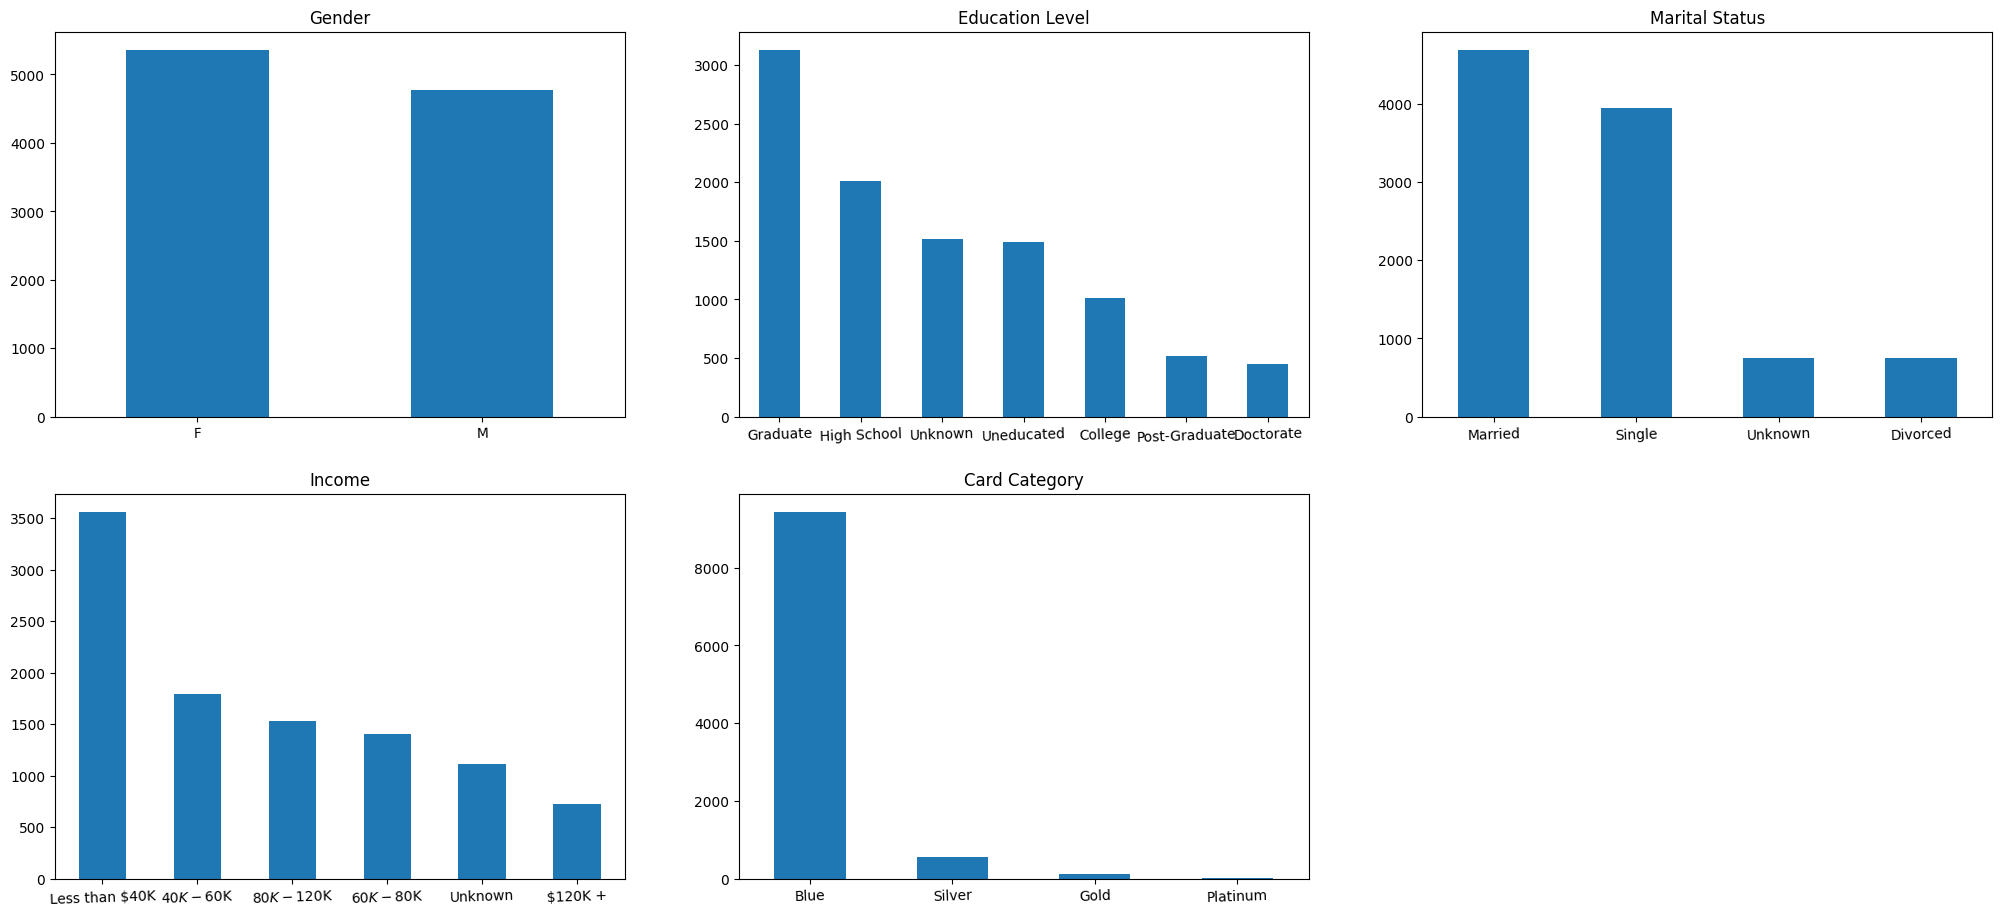

In [418]:
# plot categorical data
plt.figure(figsize=(25,11))
plt.subplot(231) 
df['Gender'].value_counts(normalize=False).plot.bar(title= 'Gender',rot=2) 
plt.subplot(232) 
df['Education_Level'].value_counts(normalize=False).plot.bar(title= 'Education Level',rot=2) 
plt.subplot(233) 
df['Marital_Status'].value_counts(normalize=False).plot.bar(title= 'Marital Status',rot=2)
plt.subplot(234) 
df['Income_Category'].value_counts(normalize=False).plot.bar(title= 'Income',rot=2)
plt.subplot(235) 
df['Card_Category'].value_counts(normalize=False).plot.bar(title= 'Card Category',rot=2)

### **Checking Values of Numerical Data**

In [419]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.839340
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.367235
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,1.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,1.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,1.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,1.000000


<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Count'>

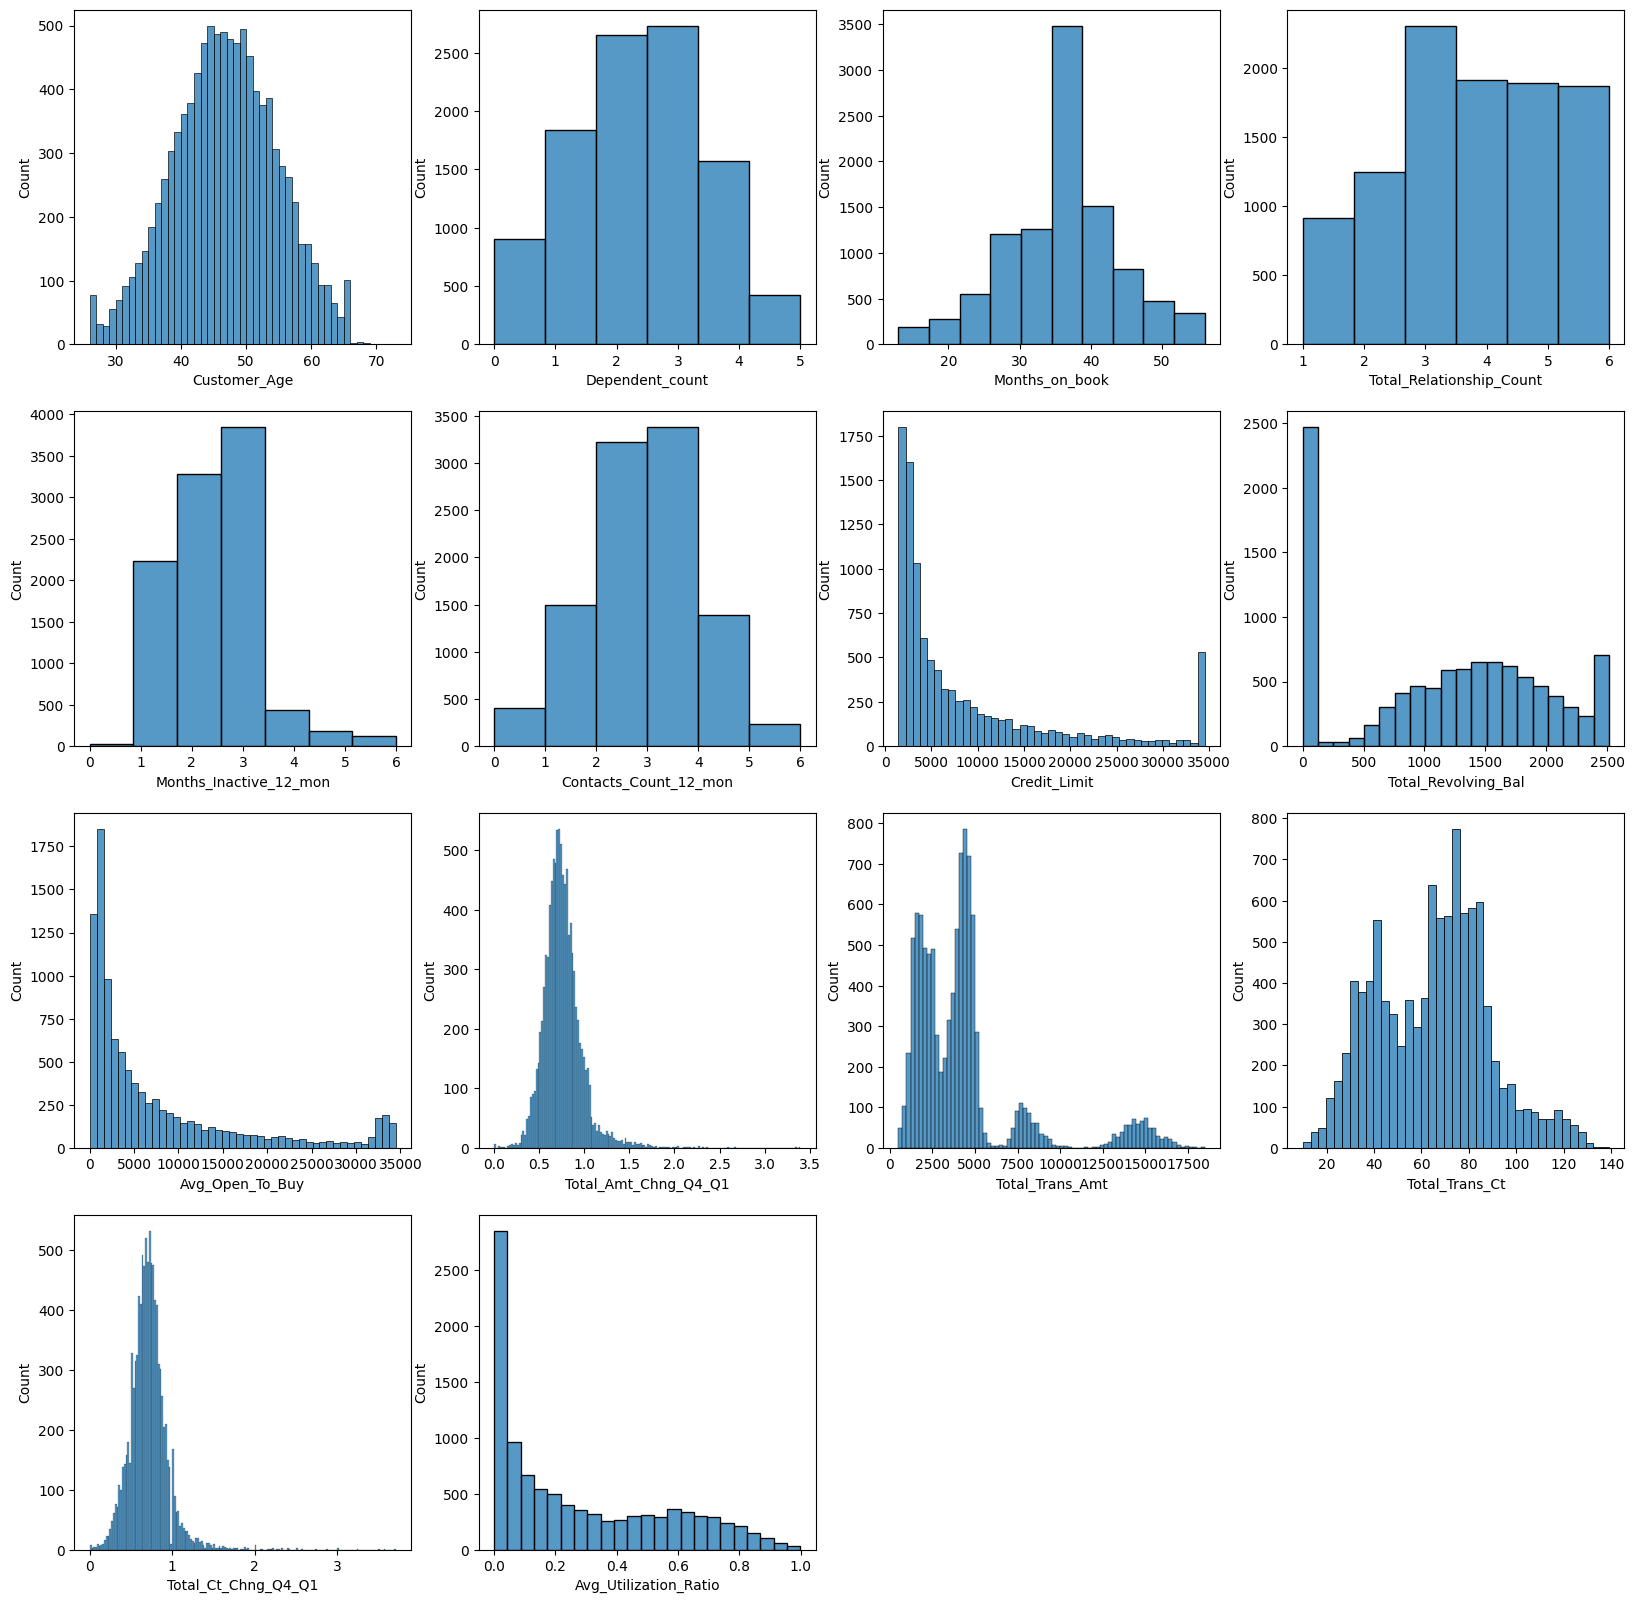

In [420]:
# plot numerical data
plt.figure(figsize=(20,20))
plt.subplot(441) 
sns.histplot(df['Customer_Age'])
plt.subplot(442) 
sns.histplot(df['Dependent_count'],bins=6)
plt.subplot(443) 
sns.histplot(df['Months_on_book'],bins=10)
plt.subplot(444) 
sns.histplot(df['Total_Relationship_Count'],bins=6)
plt.subplot(445) 
sns.histplot(df['Months_Inactive_12_mon'],bins=7)
plt.subplot(446) 
sns.histplot(df['Contacts_Count_12_mon'],bins=6)
plt.subplot(447) 
sns.histplot(df['Credit_Limit'])
plt.subplot(448) 
sns.histplot(df['Total_Revolving_Bal'])
plt.subplot(449) 
sns.histplot(df['Avg_Open_To_Buy'])
plt.subplot(4,4,10) 
sns.histplot(df['Total_Amt_Chng_Q4_Q1'])
plt.subplot(4,4,11)
sns.histplot(df['Total_Trans_Amt'])
plt.subplot(4,4,12)
sns.histplot(df['Total_Trans_Ct'])
plt.subplot(4,4,13)
sns.histplot(df['Total_Ct_Chng_Q4_Q1'])
plt.subplot(4,4,14)
sns.histplot(df['Avg_Utilization_Ratio'])